In [1]:
import radiomics as rd
import numpy as np 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from skimage.io import imread
from skimage.io import imread_collection
import os
import gzip
import shutil  #copyfile, marcar el path del archivo original y el nombre y el path donde lo que quieres copiar 
import nibabel as nib
import ntpath
from pathlib import Path

import glob

In [2]:
data_dir = '/Users/vegavazquez/Downloads/pruebas_dest/T2'
path1 = os.path.join(data_dir, '*.nii.gz')
list1=[]
collection1 = imread_collection(path1)
""""for image in collection1.files:
    img1= nib.load(image)
    images_T1.append(img1)
print(collection1)"""
for image in collection1.files:
    list1.append(image)
    print(list1)


masks=[]
data_dir_mask='/Users/vegavazquez/Downloads/pruebas_dest/MASKS'
list2=[]
path2 = os.path.join(data_dir_mask, '*.nii.gz')
collection2 = imread_collection(path2)
for image in collection2.files:
    list2.append(image)
    print(list2)
""""for image in collection2.files:
    img2= nib.load(image)
    masks.append(img2)
print(collection2)"""

['/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz']
['/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0008_T2.nii.gz']
['/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0008_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0011_T2.nii.gz']
['/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0008_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0011_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0020_T2.nii.gz']
['/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0008_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0011_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0020_T2.nii.gz', '/Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0022_T2

'"for image in collection2.files:\n    img2= nib.load(image)\n    masks.append(img2)\nprint(collection2)'

In [3]:
#creating a list of ID
import pandas
column_names = ["ID"]

DataFrame=pandas.read_csv('ID.csv', names=column_names)
print(DataFrame)
ID=DataFrame.ID.to_list()
ID.pop(0)
print(ID)

           ID
0     Subject
1    EGD-0004
2    EGD-0008
3    EGD-0011
4    EGD-0020
..        ...
165  EGD-0758
166  EGD-0762
167  EGD-0771
168  EGD-0772
169  EGD-0773

[170 rows x 1 columns]
['EGD-0004', 'EGD-0008', 'EGD-0011', 'EGD-0020', 'EGD-0022', 'EGD-0024', 'EGD-0029', 'EGD-0033', 'EGD-0041', 'EGD-0055', 'EGD-0057', 'EGD-0068', 'EGD-0072', 'EGD-0073', 'EGD-0075', 'EGD-0080', 'EGD-0085', 'EGD-0090', 'EGD-0099', 'EGD-0106', 'EGD-0107', 'EGD-0115', 'EGD-0118', 'EGD-0122', 'EGD-0123', 'EGD-0128', 'EGD-0137', 'EGD-0143', 'EGD-0144', 'EGD-0145', 'EGD-0161', 'EGD-0162', 'EGD-0165', 'EGD-0177', 'EGD-0185', 'EGD-0186', 'EGD-0187', 'EGD-0188', 'EGD-0192', 'EGD-0193', 'EGD-0194', 'EGD-0196', 'EGD-0197', 'EGD-0202', 'EGD-0208', 'EGD-0211', 'EGD-0214', 'EGD-0217', 'EGD-0226', 'EGD-0229', 'EGD-0230', 'EGD-0233', 'EGD-0234', 'EGD-0236', 'EGD-0240', 'EGD-0241', 'EGD-0243', 'EGD-0244', 'EGD-0253', 'EGD-0268', 'EGD-0280', 'EGD-0286', 'EGD-0297', 'EGD-0306', 'EGD-0309', 'EGD-0312', 'EGD-0319', 'EG

In [4]:
import pandas as pd
""""df = pd.read_csv("Names.csv", header=None)
df["new_column"] = ""
df.to_csv("Names.csv", index=True)
df.to_csv("Names.csv", header=['ID','Image','Mask'], index=True)"""
import csv
rows = zip(ID, list1, list2)

with open('T2_path.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)


df = pd.read_csv("T2_path.csv", header=None)
df.to_csv("T2_path.csv", index=True)
df.to_csv("T2_path.csv", header=['ID','Image','Mask'], index=True)



In [2]:
# Additonally, store the location of the example parameter file, stored in \pyradiomics\bin
paramPath = '/Users/vegavazquez/Downloads/TFG/pyradiomics-master/examples/exampleSettings/Params.yaml'
inputCSV= '/Users/vegavazquez/Downloads/TFG/T2_path.csv'
print ("Parameter file, absolute path:", os.path.abspath(paramPath))
print ("Paths file, absolute path:", os.path.abspath(inputCSV))

Parameter file, absolute path: /Users/vegavazquez/Downloads/TFG/pyradiomics-master/examples/exampleSettings/Params.yaml
Paths file, absolute path: /Users/vegavazquez/Downloads/TFG/T2_path.csv


In [3]:
outPath = '/Users/vegavazquez/Downloads/TFG'
outputFilepath = os.path.join(outPath, 'radiomics_features2.csv')
progress_filename = os.path.join(outPath, 'pyrad_log.txt')
print(outputFilepath)
os.path.exists(outputFilepath)
#os.path.exists(progress_filename)

/Users/vegavazquez/Downloads/TFG/radiomics_features2.csv


True

In [4]:

from __future__ import print_function

import logging
import os

import pandas
import SimpleITK as sitk

import radiomics
from radiomics import featureextractor

In [5]:
# Configure logging
rLogger = logging.getLogger('radiomics')
# Create handler for writing to log file
handler = logging.FileHandler(filename=progress_filename, mode='w')
handler.setFormatter(logging.Formatter('%(levelname)s:%(name)s: %(message)s'))
rLogger.addHandler(handler)

In [6]:
# Initialize logging for batch log messages
logger = rLogger.getChild('batch')
# Set verbosity level for output to stderr (default level = WARNING)
radiomics.setVerbosity(logging.INFO)
logger.info('pyradiomics version: %s', radiomics.__version__)
logger.info('Loading CSV')

pyradiomics version: v3.0.1
Loading CSV


In [7]:
try:
    # Use pandas to read and transpose ('.T') the input data
    # The transposition is needed so that each column represents one test case. This is easier for iteration over
    # the input cases
    flists = pandas.read_csv(inputCSV).T
except Exception:
    logger.error('CSV READ FAILED', exc_info=True)
    exit(-1)

In [8]:
from radiomics import firstorder, getTestCase, glcm, glrlm, glszm, imageoperations, shape

In [9]:
logger.info('Loading Done')
logger.info('Patients: %d', len(flists.columns)) #ALL PATIENTS

Loading Done
Patients: 169


In [10]:
if os.path.isfile(paramPath):
    extractor = featureextractor.RadiomicsFeatureExtractor(paramPath)
else:  # Parameter file not found, use hardcoded settings instead
    settings = {}
    settings['binWidth'] = 25
    settings['resampledPixelSpacing'] = None  # [3,3,3]
    settings['interpolator'] = sitk.sitkBSpline
    settings['enableCExtensions'] = True

    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    # extractor.enableInputImages(wavelet= {'level': 2})

Loading parameter file /Users/vegavazquez/Downloads/TFG/pyradiomics-master/examples/exampleSettings/Params.yaml


In [11]:
logger.info('Enabled input images types: %s', extractor.enabledImagetypes)
logger.info('Enabled features: %s', extractor.enableFeatureClassByName)
logger.info('Current settings: %s', extractor.settings)
logger.info('show shape features: %s', extractor.enableAllFeatures)

Enabled input images types: {'Original': {}}
Enabled features: <bound method RadiomicsFeatureExtractor.enableFeatureClassByName of <radiomics.featureextractor.RadiomicsFeatureExtractor object at 0x7f95ba7b8640>>
Current settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
show shape features: <bound method RadiomicsFeatureExtractor.enableAllFeatures of <radiomics.featureextractor.RadiomicsFeatureExtractor object at 0x7f95ba7b8640>>


In [12]:
# Instantiate a pandas data frame to hold the results of all patients
results = pandas.DataFrame()

In [14]:
import pandas as pd 
df=pd.read_csv(inputCSV)
df.head()

,Unnamed: 0,ID,Image,Mask
0,0,EGD-0004,/Users/vegavazquez/Downloads/pruebas_dest/T2/E...,/Users/vegavazquez/Downloads/pruebas_dest/MASK...
1,1,EGD-0008,/Users/vegavazquez/Downloads/pruebas_dest/T2/E...,/Users/vegavazquez/Downloads/pruebas_dest/MASK...
2,2,EGD-0011,/Users/vegavazquez/Downloads/pruebas_dest/T2/E...,/Users/vegavazquez/Downloads/pruebas_dest/MASK...
3,3,EGD-0020,/Users/vegavazquez/Downloads/pruebas_dest/T2/E...,/Users/vegavazquez/Downloads/pruebas_dest/MASK...
4,4,EGD-0022,/Users/vegavazquez/Downloads/pruebas_dest/T2/E...,/Users/vegavazquez/Downloads/pruebas_dest/MASK...


In [15]:
for entry in flists:  # Loop over all columns (i.e. the test cases)
    logger.info("(%d/%d) Processing Patient (Image: %s, Mask: %s)",
                entry + 1,
                len(flists),
                flists[entry]['Image'],
                flists[entry]['Mask'])
    imageFilepath = flists[entry]['Image']
    maskFilepath = flists[entry]['Mask']
    label = flists[entry].get('ID', None)
    
    if str(label).isdigit():
        label = int(label)
    else:
        label = None
        
    if (imageFilepath is not None) and (maskFilepath is not None):
        featureVector = flists[entry]  # This is a pandas Series
        featureVector['Image'] = os.path.basename(imageFilepath)
        featureVector['Mask'] = os.path.basename(maskFilepath)
        try:
        # PyRadiomics returns the result as an ordered dictionary, which can be easily converted to a pandas Series
        # The keys in the dictionary will be used as the index (labels for the rows), with the values of the features
        # as the values in the rows.
            result = pandas.Series(extractor.execute(imageFilepath, maskFilepath, label))
            featureVector = featureVector.append(result)
        except Exception:
            logger.error('FEATURE EXTRACTION FAILED:', exc_info=True)
        # To add the calculated features for this case to our data frame, the series must have a name (which will be the
          # name of the column.
        featureVector.name = entry
          # By specifying an 'outer' join, all calculated features are added to the data frame, including those not
          # calculated for previous cases. This also ensures we don't end up with an empty frame, as for the first patient
          # it is 'joined' with the empty data frame.
        results = results.join(featureVector, how='outer')  # If feature extraction failed, results will be all NaN
    logger.info('Extraction complete, writing CSV')
  # .T transposes the data frame, so that each line will represent one patient, with the extracted features as columns
    results.T.to_csv(outputFilepath, index=False, na_rep='NaN')
    logger.info('CSV writing complete')
    

(1/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0004_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0004_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(2/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0008_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0008_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding im

Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(13/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0072_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0072_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/

Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(24/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0122_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0122_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br

Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(35/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0185_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0185_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_1742

Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(46/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0211_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0211_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:

Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(57/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0243_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0243_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is depreca

Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(68/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0321_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0321_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a

Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(79/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0357_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0357_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use 

Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(90/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0410_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0410_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(101/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0472_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0472_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(112/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0508_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0508_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(123/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0541_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0541_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(134/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0595_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0595_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(145/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0647_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0647_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(156/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0709_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0709_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featureVector = featureVector.append(result)
Extraction complete, writing CSV
CSV writing complete
(167/4) Processing Patient (Image: /Users/vegavazquez/Downloads/pruebas_dest/T2/EGD-0771_T2.nii.gz, Mask: /Users/vegavazquez/Downloads/pruebas_dest/MASKS/EGD-0771_MASK.nii.gz)
Calculating features with label: 1
Loading image and mask
Computing shape
Adding image type "Original" with custom settings: {}
Calculating features for original image
Computing firstorder
Computing glcm
Computing glrlm
Computing glszm
Computing gldm
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_17421/3992130525.py:25: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  featu

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from skimage.util import montage as montage2d
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread
BASE_IMG_PATH=os.path.join('..','pruebas_dest')

In [26]:
all_images=glob(os.path.join(BASE_IMG_PATH,'T2','*'))

In [27]:
all_masks=glob(os.path.join(BASE_IMG_PATH,'MASKS','*'))

In [28]:
print(len(all_images),' matching files found:',all_images[0], all_masks[0])


169  matching files found: ../pruebas_dest/T2/EGD-0502_T2.nii.gz ../pruebas_dest/MASKS/EGD-0434_MASK.nii.gz


/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_7363/2466853767.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_image=nib.load(all_images[0]).get_data()
/var/folders/8n/65lgx8_521zfk3j4kj4x82br0000gn/T/ipykernel_7363/2466853767.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  test_mask=nib.load(all_masks[0]).get_data()


Text(0.5, 1.0, 'Mask')

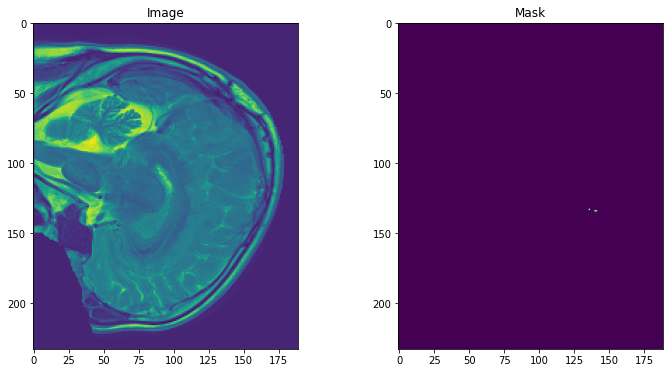

In [30]:
%matplotlib inline
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

test_image=nib.load(all_images[0]).get_data()
test_mask=nib.load(all_masks[0]).get_data()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.imshow(test_image[test_image.shape[0]//2])
ax1.set_title('Image')
ax2.imshow(test_mask[test_image.shape[0]//2])
ax2.set_title('Mask')

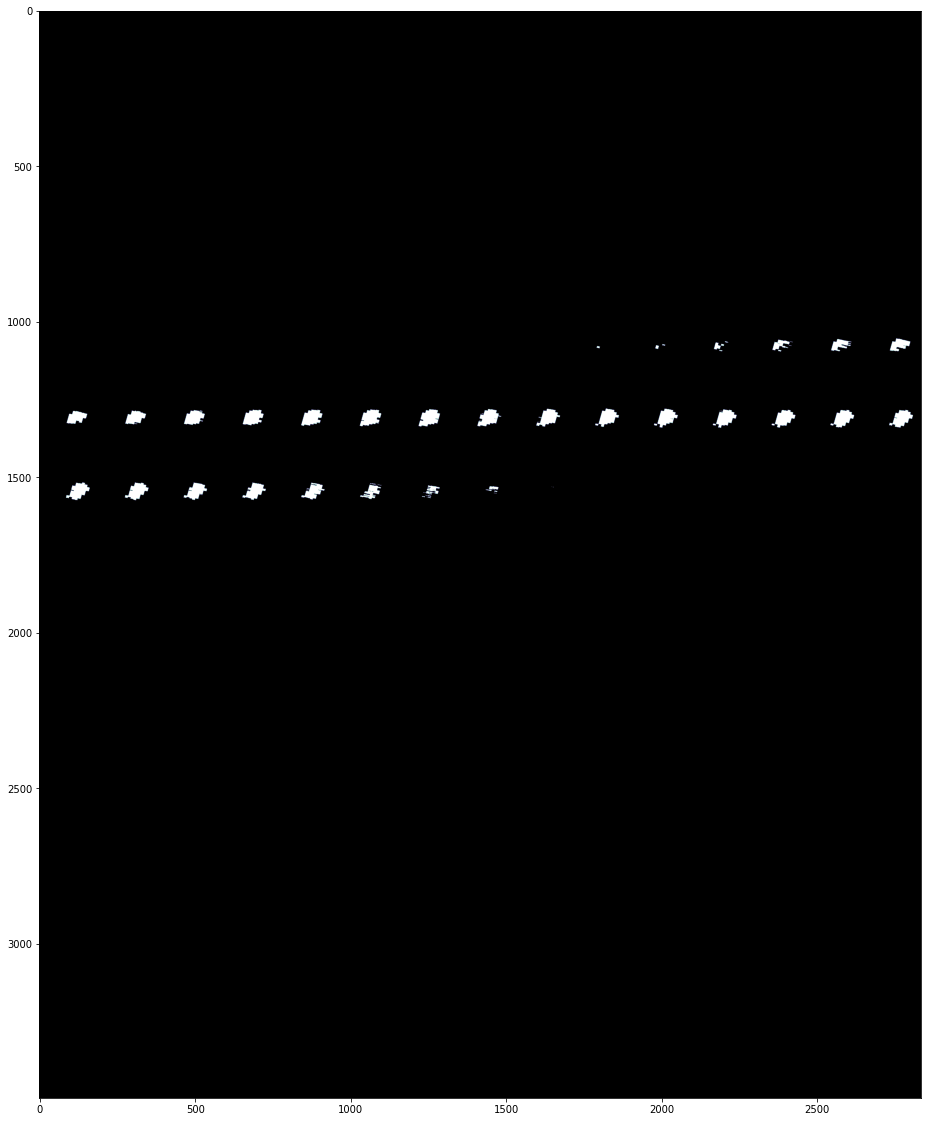

In [31]:
fig, ax1 = plt.subplots(1,1, figsize = (20, 20))
ax1.imshow(montage2d(test_mask), cmap ='bone')
fig.savefig('mask.png')